In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fileI(filename):
    tmp = []
    f = open(filename,'r');
    lines = f.readlines()
    for line in lines:
        tmp.append(line);
    out=np.zeros([len(tmp),5]);
    for i in range(len(out)):
        out[i,:] = np.array(tmp[i].split()).astype(np.float)
    return out;

In [3]:
def cwt_newland(p,k,time,th):  # p = No. of bands / k = time shift (integer)
    def w(m,n,x):
        x[x==0]=1e-20;
        return (np.exp(1j*n*2*np.pi*x)-np.exp(1j*m*2*np.pi*x))/(1j*(n-m)*2*np.pi*x);
    def wb(m,n,x):
        return np.conjugate(w(m,n,x));
    def a(m,n,k,time,th):
        ff = th*wb(m,n,time-k/(n-m));
        int_ff = np.trapz(ff,time);
        int_ff *= (n-m)
        return int_ff;
    def ab(m,n,k,time,th):
        ff = th*w(m,n,time-k/(n-m));
        int_ff = np.trapz(ff,time);
        int_ff *= (n-m)
        return int_ff;
    dt = time[1]-time[0]; fmax = 1/(2*dt);
    k1 = -k; k2 = k;
    bw = fmax/p;
    m = np.arange(0,fmax,bw)
    n = m+bw;
    a_out = np.zeros([len(m),2*k],'complex');
    ab_out = np.zeros([len(m),2*k],'complex');
    w_out = np.zeros([len(m),len(time),2*k],'complex');
    wb_out = np.zeros([len(m),len(time),2*k],'complex');
    for k in range(k1,k2):
        for i in range(len(m)):
            a_out[i,k] = a(m[i],n[i],k,time,th);
            ab_out[i,k] = ab(m[i],n[i],k,time,th);
            w_out[i,:,k] = w(m[i],n[i],time-k/(n[i]-m[i]));
            wb_out[i,:,k] = wb(m[i],n[i],time-k/(n[i]-m[i]));
    return a_out,ab_out,w_out,wb_out;

In [4]:
def icwt_newland(a,ab,w,wb):
    lenm = len(a[:,0]);
    lenk = len(a[0,:]);
    lent = len(w[0,:,0]);
    th = np.zeros(lent,'complex');
    for i in range(lenm):
        for j in range(lenk):
            th += a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j];
    return th;

### Example

In [5]:
data = fileI("RSN454_MORGAN_GIL067.AT2");

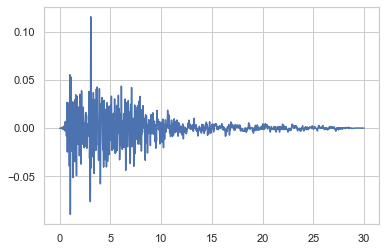

In [6]:
th = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th[idx] = data[i,j];
        idx += 1;
dt = 0.005; tmax = dt*len(th);
time = np.arange(dt,tmax+dt,dt);
plt.plot(time,th);

In [7]:
a_out,ab_out,w_out,wb_out = cwt_newland(p=20,k=100,time=time,th=th);

In [8]:
new_th = icwt_newland(a_out,ab_out,w_out,wb_out)

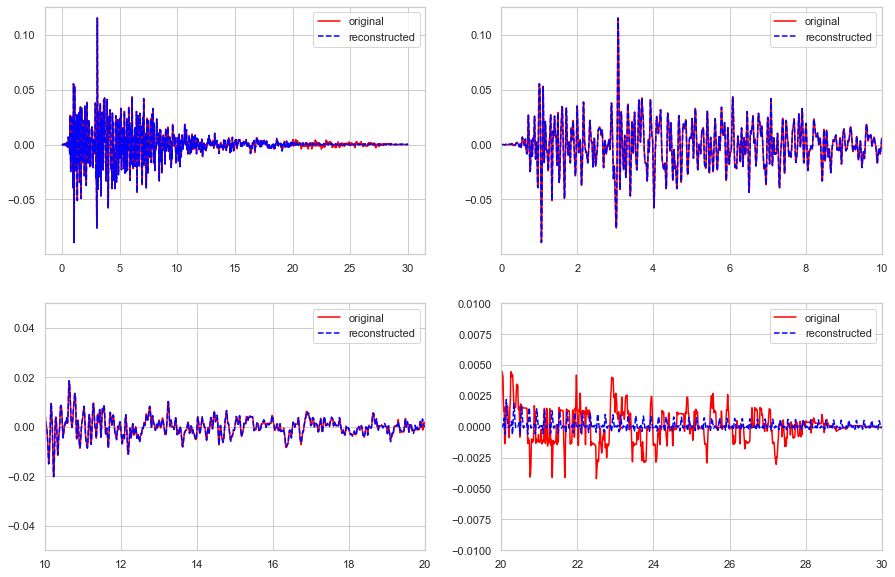

In [9]:
plt.figure(figsize=(15,10));
plt.subplot(221);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.legend();
plt.subplot(222);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(0,10);
plt.legend();
plt.subplot(223);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(10,20);
plt.ylim(-0.05,0.05);
plt.legend();
plt.subplot(224);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(20,30);
plt.ylim(-0.01,0.01);
plt.legend();